In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
train=pd.read_csv("C:/Users/AKANKSHA/Downloads/titanic/train.csv")

In [64]:
test=pd.read_csv("C:/Users/AKANKSHA/Downloads/titanic/test.csv")

In [65]:
train.shape
test.shape

(418, 11)

In [66]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [67]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [68]:
train.drop(columns=['Cabin'],inplace=True)
test.drop(columns=['Cabin'],inplace=True)

In [69]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [70]:
train['Embarked'].fillna("S",inplace=True)

In [71]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [72]:
test['Fare'].fillna(test['Fare'].mean(),inplace=True)

In [73]:
train_age=np.random.randint(train['Age'].mean()-train['Age'].std(),train['Age'].mean()+train['Age'].std(),177)

In [74]:
test_age=np.random.randint(test['Age'].mean()-test['Age'].std(),test['Age'].mean()+test['Age'].std(),86)

In [75]:
train['Age'] [train['Age'].isnull()]=train_age

C:\Users\AKANKSHA\AppData\Local\Temp/ipykernel_3092/1819885287.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Age'] [train['Age'].isnull()]=train_age


In [76]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [77]:
test['Age'] [test['Age'].isnull()]=test_age

C:\Users\AKANKSHA\AppData\Local\Temp/ipykernel_3092/3573888029.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Age'] [test['Age'].isnull()]=test_age


In [78]:
train.groupby(['Pclass'])['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [79]:
train.groupby(['Sex'])['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

c:\Users\AKANKSHA\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

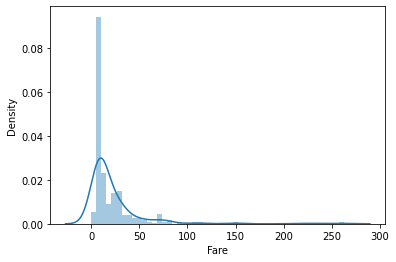

In [80]:
sns.distplot(train['Fare'][train['Survived']==0])

In [81]:
train.drop(columns=['Ticket'],inplace=True)

In [82]:
test.drop(columns=['Ticket'],inplace=True)

In [83]:
train['family']=train['SibSp']+train['Parch']+1

In [84]:
test['family']=test['SibSp']+test['Parch']+1

In [86]:
def cal(number):
    if number==1:
        return"Alone"
    elif number>1 and number<5:
        return "Medium"
    else:
        return "Large"


In [87]:
train['family_size']=train['family'].apply(cal)

In [88]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,family,family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,Medium
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,Medium
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,Medium
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,Alone


In [89]:
test['family_size']=test['family'].apply(cal)

In [90]:
train.drop(columns=['SibSp','Parch','family'],inplace=True)
test.drop(columns=['SibSp','Parch','family'],inplace=True)

In [91]:
passengerId=test['PassengerId'].values

In [92]:
train.drop(columns=['Name','PassengerId'],inplace=True)
test.drop(columns=['Name','PassengerId'],inplace=True)

In [93]:

train=pd.get_dummies(train,columns=['Pclass','Sex','Embarked','family_size'],drop_first=True)

In [94]:
test=pd.get_dummies(test,columns=['Pclass','Sex','Embarked','family_size'],drop_first=True)

In [95]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Survived            891 non-null    int64  
 1   Age                 891 non-null    float64
 2   Fare                891 non-null    float64
 3   Pclass_2            891 non-null    uint8  
 4   Pclass_3            891 non-null    uint8  
 5   Sex_male            891 non-null    uint8  
 6   Embarked_Q          891 non-null    uint8  
 7   Embarked_S          891 non-null    uint8  
 8   family_size_Large   891 non-null    uint8  
 9   family_size_Medium  891 non-null    uint8  
dtypes: float64(2), int64(1), uint8(7)
memory usage: 27.1 KB


In [96]:
X=train.iloc[:,1:].values
y=train.iloc[:,0].values

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [99]:
from sklearn.tree import DecisionTreeClassifier

In [100]:
classfier=DecisionTreeClassifier()

In [101]:
classfier.fit(X_train,y_train)

DecisionTreeClassifier()

In [102]:
y_pred=classfier.predict(X_test)

In [103]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.8324022346368715

In [104]:
Xf=test.iloc[:,:].values

In [105]:
y_final=classfier.predict(Xf)

In [106]:
final=pd.DataFrame()

In [107]:
final['passengerId']=passengerId
final['survived']=y_final

In [108]:
final

,passengerId,survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [110]:
final.to_csv('submission.csv',index=False)